In [8]:
import networkx as nx
import numpy as np
import scipy as sp
import community
import matplotlib.pyplot as plt


# Redo community detection with another modularity algorithm 

In [2]:
N = 200
p = 0.1
   
G_i = nx.erdos_renyi_graph(N,p)
part_2 = nx.community.greedy_modularity_communities(G_i)

num_commun_ = len(part_2)

print(len(part_2))

5


# Likelihoods of Erdős-Rényi and configuration models for a random network

In [3]:
def log_factorial(n):
    return sp.special.loggamma(n+1)

def log_double_factorial(n):
    if n % 2 == 0:
        k = n/2
        return k*np.log(2.) + log_factorial(k)
    else:
        k = (n+1)/2
        return log_factorial(2.*k - 1.) - k*np.log(2.) - log_factorial(k - 1.)

def entropy_simple_ER(G):    
    N = G.number_of_nodes()
    E = G.number_of_edges()
    A = nx.adjacency_matrix(G)

    
    return log_factorial( N*(N-1)/2. ) - log_factorial(E) - log_factorial( N*(N-1)/2. - E )

def entropy_CM(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    A = nx.adjacency_matrix(G)
    degrees = [d for n, d in G.degree()]
    
    return log_factorial(2*E) - log_double_factorial(2*E) - np.sum([log_factorial(d) for d in degrees])


In [4]:
N = 200
p = 0.1
E = N*(N-1)*p/2
   
G_i = nx.gnm_random_graph(N,E)

print('log-likelihoods: ER:', -entropy_simple_ER(G_i), 'CM:', -entropy_CM(G_i))

print ('Orders-of magnitude ratio between likelihoods', (entropy_simple_ER(G_i)-entropy_CM(G_i)) / np.log(10.) )


log-likelihoods: ER: -6464.486924914294 CM: -6006.577046016544
Orders-of magnitude ratio between likelihoods 198.86773361427905


In [7]:
N = 200
p = 0.1
E = N*(N-1)*p/2
M = 200

l_ER = []
l_CM = []
differences = []

for m in range(M):
    G_i = nx.gnm_random_graph(N,E)
    l_ER.append(-entropy_simple_ER(G_i))
    l_CM.append(-entropy_CM(G_i))
    differences.append(entropy_simple_ER(G_i)-entropy_CM(G_i))
    
    

Text(0, 0.5, 'count')

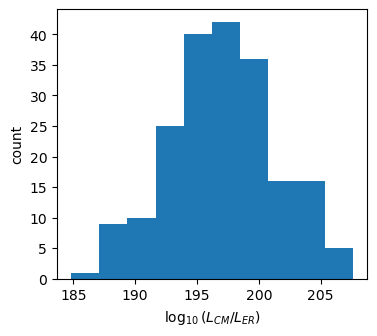

In [9]:
fig, ax = plt.subplots(1,1,figsize=(4,3.5),dpi=100)

ax.hist(np.array(differences)/np.log(10))
ax.set_xlabel(r'$\log_{10}(L_{CM}/L_{ER})$')
ax.set_ylabel('count')

# Coin toss

conda install seaborn


In [25]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# configure style
mpl.rc('text', usetex=True)
mpl.rc('font', size=16)
sns.set_style("darkgrid")
sns.set_context("talk", rc={"figure.figsize": (12, 8)}, font_scale=1.5)
current_palette = sns.color_palette()

def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, alpha, beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=12)
    ax.set_ylabel(r"$P(\theta)$", fontsize=20)
    ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));
    

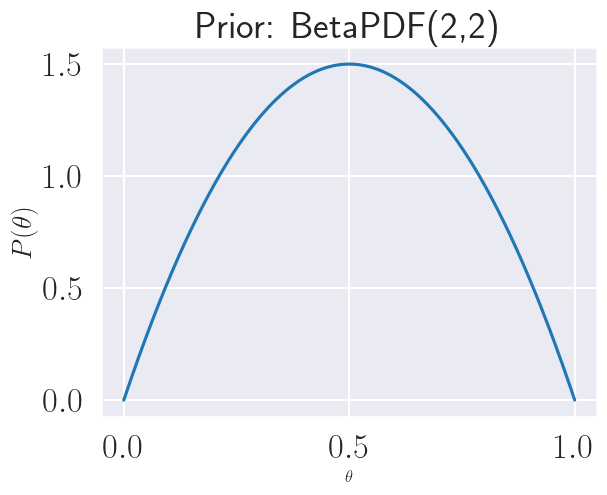

In [26]:
plot_prior(alpha=2, beta=2)

In [17]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

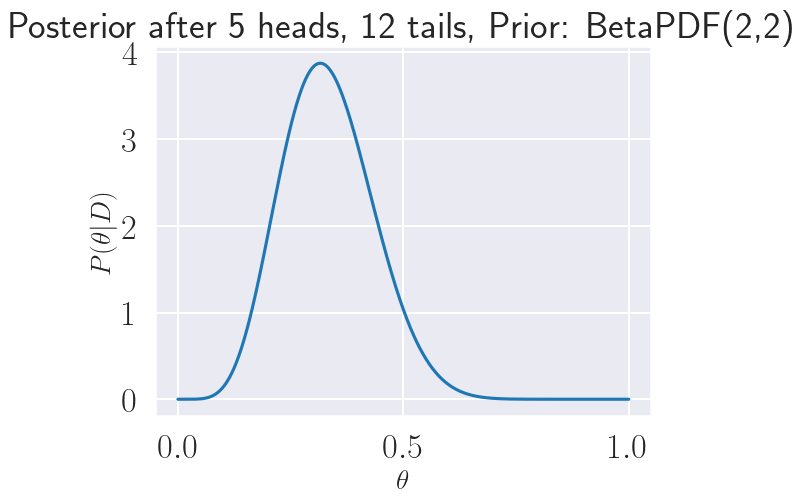

In [18]:
plot_posterior(heads=5, tails=12, alpha=2, beta=2)

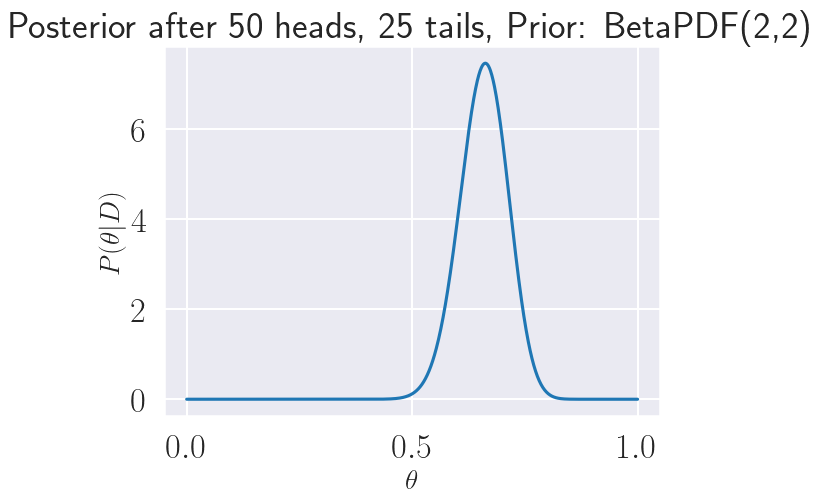

In [21]:
plot_posterior(heads=50, tails=25, alpha=2, beta=2)

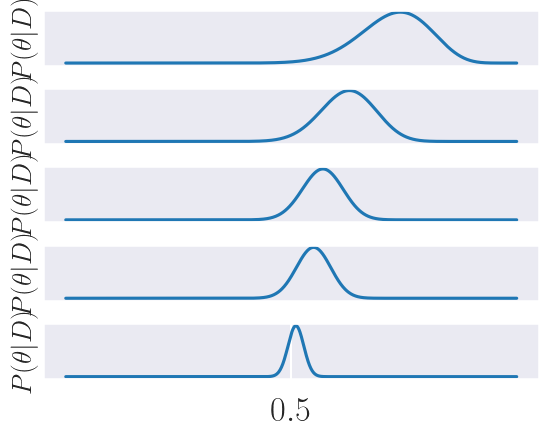

In [27]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=20)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=20)
 
fig, axes = plt.subplots(5)
flips = [(4, 5), (20, 20), (50, 49), (75, 74), (400, 399)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=20, beta=4, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.4)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.5]);

# Codelengths of Erdős-Rényi and configuration models for a random network

In [ ]:
def L_N(n):
    return np.log(n*(n+1))

def complexity_ER(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    
    return L_N(N) + L_N(E)

def complexity_CM(G):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    degrees = [d for n, d in G.degree()]
    delta = np.min(degrees)
    Delta = np.max(degrees)
    
    return L_N(N) + L_N(delta)  + L_N(Delta) + N*np.log(Delta - delta + 1)

In [177]:
N = 200
p = 0.1
E = N*(N-1)*p/2
   
G_i = nx.gnm_random_graph(N,E)

codelength_ER = (entropy_simple_ER(G_i) + complexity_ER(G_i)) / np.log(2)
codelength_CM = (entropy_CM(G_i) + complexity_CM(G_i)) / np.log(2)

print('codelengths: ER:', codelength_ER , 'CM:', codelength_CM)

print ('Codelength difference', codelength_ER - codelength_CM)

codelengths: ER: 9363.495966567501 CM: 9613.757469031394
Codelength difference -250.2615024638926
